In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

# 1-D Example Data

## Create Model

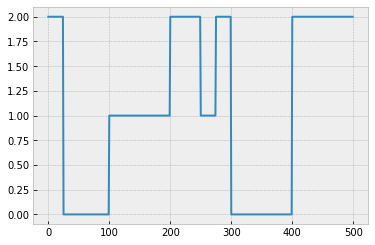

In [2]:
# create vectors
phys_space = np.array([np.arange(500)]).T
feat_space = np.random.randn(500,3)

# np.random.seed(12345)

# define domain
latent_1D = np.zeros_like(phys_space[:,0])
dist = scipy.stats.bernoulli(0.01)
dist2 = scipy.stats.bernoulli(0.45)

# create latent field

# val = 0
# for i in range(len(phys_space[:,0])):
#     if dist.rvs():
#         if  dist2.rvs():
#             val = 2 - val
#         else:
#             val = 1 - val
#     latent_1D[i] = val

latent_1D = np.ones(25)*2
latent_1D = np.append(latent_1D, np.ones(75)*0)
latent_1D = np.append(latent_1D, np.ones(100)*1)
latent_1D = np.append(latent_1D, np.ones(50)*2)
latent_1D = np.append(latent_1D, np.ones(25)*1)
latent_1D = np.append(latent_1D, np.ones(25)*2)
latent_1D = np.append(latent_1D, np.ones(100)*0)
latent_1D = np.append(latent_1D, np.ones(100)*2)

plt.plot(latent_1D);

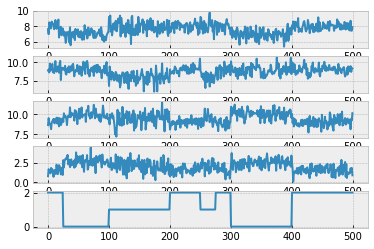

In [3]:
i = 4
c1 = scipy.stats.multivariate_normal([7,9,10,2.7], np.eye(i)*0.35)
c2 = scipy.stats.multivariate_normal([8,8,9.5,2], np.eye(i)*0.55)
c3 = scipy.stats.multivariate_normal([8,9,9,1.5], np.eye(i)*0.25)
#c4 = scipy.stats.multivariate_normal([8,10,9,4], np.eye(i)*0.25)

obs = np.empty((len(phys_space[:,0]), 4))

for i,l in enumerate(latent_1D):
    # generate a 2-d random vector at each point
    if l == 0:
        obs[i,:] = c1.rvs()
    elif l == 1:
        obs[i,:] = c2.rvs()
    elif l == 2:
        obs[i,:] = c3.rvs()
        
fig, ax = plt.subplots(5,1)
ax[0].plot(obs[:,0])
ax[1].plot(obs[:,1])
ax[2].plot(obs[:,2])
ax[3].plot(obs[:,3])
ax[4].plot(latent_1D)

# Model

In [7]:
ex1 = bayseg.BaySeg(phys_space, obs, n_labels=3, beta_init=10, bic=False)

In [8]:
ex1.fit(50, beta_jump_length=5, verbose=False)

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.51it/s]


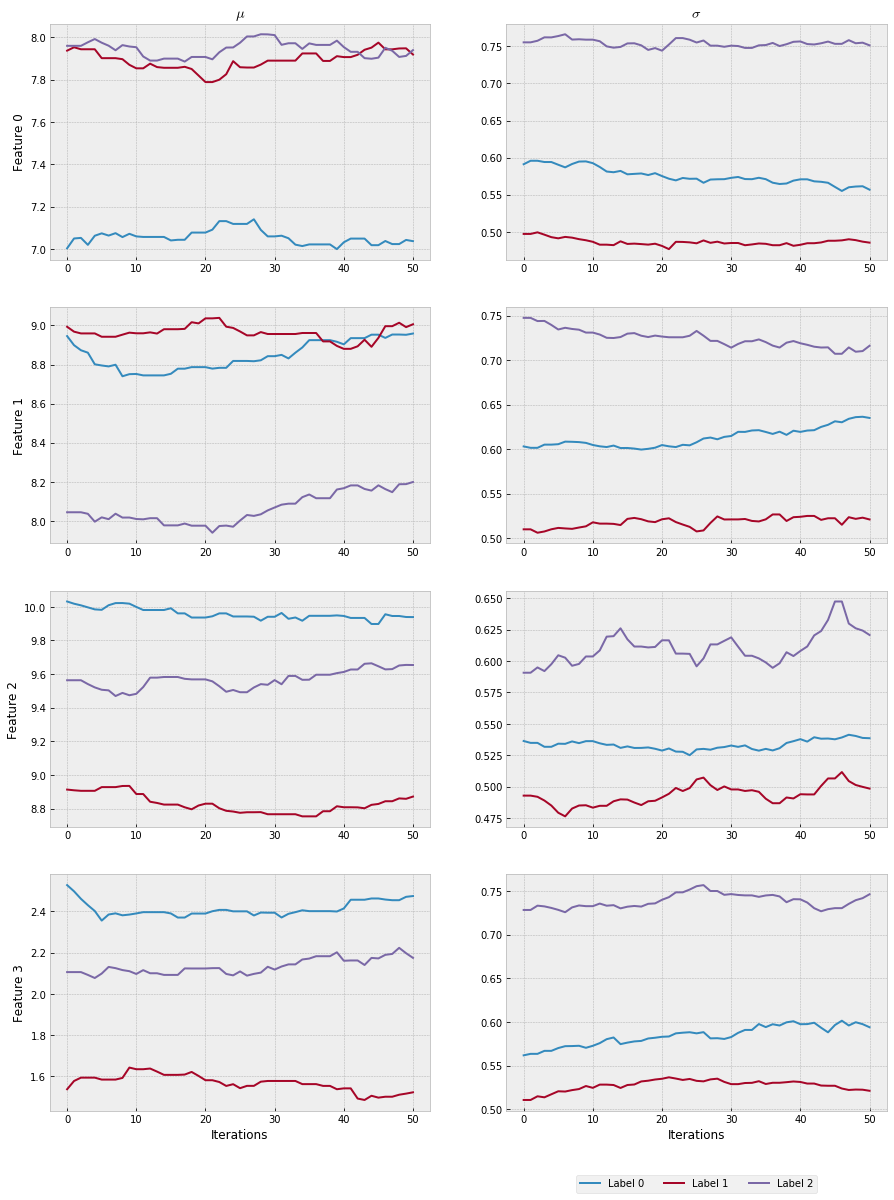

In [9]:
ex1.plot_mu_stdev()
# plt.tight_layout()
# plt.savefig("mu_stdev.png")

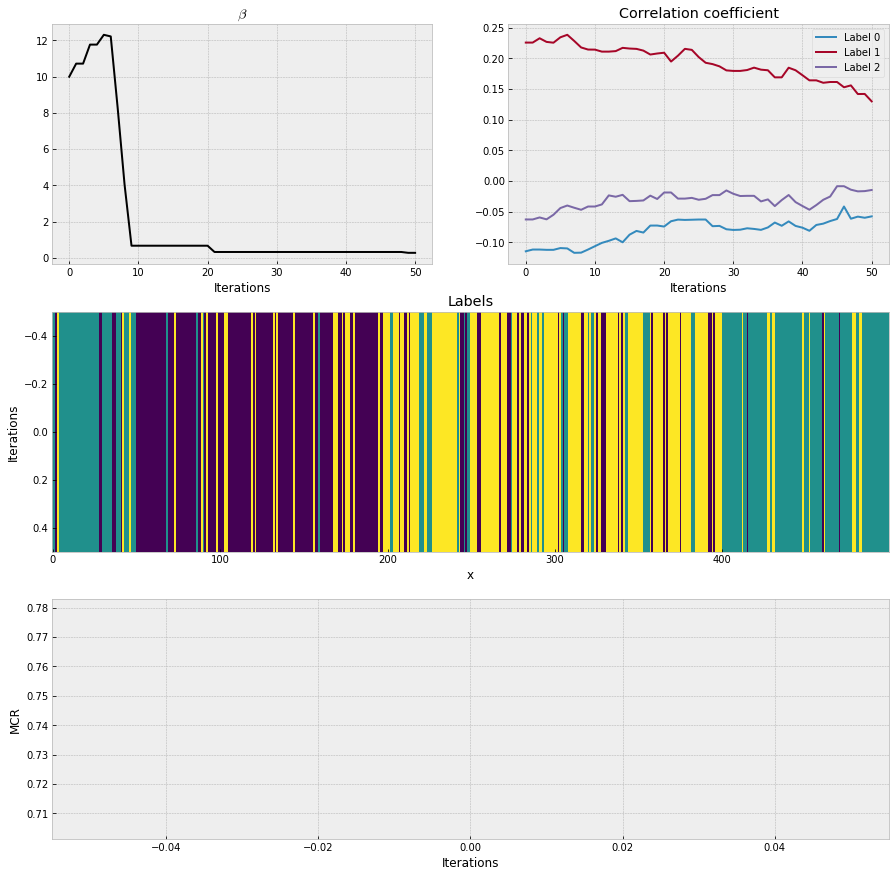

In [10]:
ex1.diagnostics_plot(true_labels=latent_1D)
#plt.tight_layout()
#plt.savefig("diagn.png")

# VECTORIZE

In [ ]:
import numpy as np
from sklearn import mixture
from scipy.stats import multivariate_normal, norm
from copy import copy
from itertools import combinations
import tqdm  # progress bar
import matplotlib.pyplot as plt
from matplotlib import gridspec  # plot arrangements

In [ ]:
def calc_gibbs_energy(self, labels, beta):
    """
    Calculates Gibbs energy for each element using a penalty factor beta.
    :param labels: Array of labels at each element.
    :param beta: Energetic penalty parameter.
    :return: Gibbs energy for each element.
    """
    if self.dim == 1:
        # create ndarray for gibbs energy depending on element structure and n_labels
        gibbs_energy = np.zeros((len(self.coords), self.n_labels))
        for x, nl in enumerate(self.neighborhood):
            for n in nl:
                for l in range(self.n_labels):
                    if l != labels[n]:
                        gibbs_energy[x, l] += beta

    elif self.dim == 2:
        pass
        # TODO: 2-dimensional calculation of gibbs energy
    elif self.dim == 3:
        pass
        # TODO: 3-dimensional calculation of gibbs energy

    # TODO: Optimize gibbs energy calculation
    return gibbs_energy

In [ ]:
calc_gibbs_energy(ex1, labels, 0.5)

In [ ]:
def pseudocolor(coords):
    
    # 
    i_w = np.arange(0, len(coords), step=2)
    i_b = np.arange(1, len(coords), step=2)
    
    return np.array([i_w, i_b]).T

In [ ]:
colors

In [ ]:
a = l[colors[:,0],:]

In [ ]:
np.not_equal(np.arange(3), a[0, :]) * beta

In [ ]:
a = l[colors[:,1],:]
np.expand_dims(np.not_equal(np.arange(3), a[-1, :]) * beta, axis=0)

In [ ]:
labels = ex1.labels[-1]

In [ ]:
gibbs_energy.astype(float)

In [ ]:
gibbs_energy

In [ ]:
beta = 0.5
n_labels = 3
coords = np.array([np.arange(500,1000)]).T

ge_temp = np.arange(n_labels) # elemnts x labels
ge_temp = np.tile(ge_temp, (len(coords),1))
ge_temp = ge_temp.astype(float)

print("gibbs energy temp")
print(ge_temp)
print("gibbs energy temp shp:", np.shape(ge_temp))

print("\n")

colors = pseudocolor(coords)

l = np.tile(labels, (n_labels,1)).T

print("\n")
print("stacked labels")
print(l)

# first color
a = l[colors[:,0],:]

## first row
top = np.expand_dims(np.not_equal(np.arange(3), a[0, :]).astype(float) * beta, axis=0)
## mid
mid = (np.not_equal(ge_temp[colors[:-1,0],:], a[:-1, :]).astype(float) + np.not_equal(ge_temp[colors[1:,0],:], a[1:, :]).astype(float)) * beta
## last row
#bot = np.expand_dims(np.not_equal(np.arange(3), a[-1, :]) * beta, axis=0)
## concatenate
c1 = np.concatenate((top, mid))

print("\n")
print("c1 shp:",np.shape(c1))

# second color
a = l[colors[:,1],:]

## first row
# top = np.expand_dims(np.not_equal(np.arange(3), a[1, :]) * beta, axis=0)
## mid
mid = (np.not_equal(ge_temp[colors[:-1,1],:], a[:-1, :]).astype(float) + np.not_equal(ge_temp[colors[1:,1],:], a[1:, :]).astype(float)) * beta
## last row
bot = np.expand_dims(np.not_equal(np.arange(3), a[-1, :]).astype(float) * beta, axis=0)
## concatenate
c2 = np.concatenate((mid, bot))

print("c2 shp:",np.shape(c2))

# concatenate both
ge_temp[colors[:,0]] = c1
ge_temp[colors[:,1]] = c2

print("\n")
print("gibbs energy")
print(ge_temp)

In [ ]:
%%timeit
np.random.choice(3,500)

In [ ]:
%%timeit
np.array([np.random.choice(3) for i in range(500)])

In [ ]:
np.place(gibbs_energy, )

In [ ]:
c1[0]

In [ ]:
gibbs_energy[0]

In [ ]:
gibbs_energy[0,:] = c1[0]
print(c1[0])
gibbs_energy[0,:]

In [ ]:
gibbs_energy[0,:]

In [ ]:
c1[0]

In [ ]:
c2[-1]

In [ ]:
gibbs_energy

In [ ]:
np.shape(c1)

In [ ]:
np.shape(c2)

In [18]:
def calc_gibbs_energy_vect(self, labels, beta, n_labels):
    # tile
    l = np.tile(labels, (n_labels,1)).T
    
    ge = np.arange(n_labels) # elemnts x labels
    ge = np.tile(ge, (len(labels), 1))
    ge = ge.astype(float)
    
    # first row
    top = np.expand_dims(np.not_equal(np.arange(n_labels), l[1, :]) * beta, axis=0)
    # mid
    mid = (np.not_equal(ge[:-1, :], l[:-1, :]).astype(int) + np.not_equal(ge[1:, :], l[1:, :]).astype(int)) * beta
    # last row
    bot = np.expand_dims(np.not_equal(np.arange(n_labels), l[-1, :]) * beta, axis=0)
    # concatenate
    gibbs_energy = np.concatenate((top, mid, bot))
    
    return gibbs_energy

In [19]:
ex1.calc_gibbs_energy(ex1.labels[-1], 0.5)

array([[ 0.5,  0. ,  0.5],
       [ 0.5,  0.5,  1. ],
       [ 1. ,  0.5,  0.5],
       ..., 
       [ 1. ,  0. ,  1. ],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0. ,  0.5]])

In [20]:
ex1.labels[-1]

array([1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2,

In [21]:
calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5, 3)

array([[ 0.5,  0. ,  0.5],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0.5,  1. ],
       ..., 
       [ 1. ,  0. ,  1. ],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0. ,  0.5]])

In [ ]:
gibbs_energy

In [ ]:
np.expand_dims(top, axis=0)

In [ ]:
top

In [ ]:
mid

In [ ]:
labels = ex1.labels[-1]

In [ ]:
ex1.neighborhood

In [ ]:
calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5)

In [ ]:
def calc_gibbs_energy_vect(self, labels, beta):

    gibbs_energy = np.zeros((len(self.coords), self.n_labels))
    print(np.shape(gibbs_energy))
    
    for x, nl in enumerate(self.neighborhood):
        for n in nl:
            for l in range(self.n_labels):
                if l != labels[n]:
                    gibbs_energy[x, l] += beta
    
    # TODO: 2-dimensional calculation of gibbs energy
    # TODO: 3-dimensional calculation of gibbs energy
    # TODO: Optimize gibbs energy calculation
    return gibbs_energy

In [ ]:
import numpy as np
from sklearn import mixture
from scipy.stats import multivariate_normal, norm
from copy import copy
from itertools import combinations
import tqdm  # progress bar
import matplotlib.pyplot as plt
from matplotlib import gridspec  # plot arrangements

In [ ]:
def calc_labels_prob(te, t):
    """"Calculate labels probability for array of total energies (te) and totally arbitrary skalar value t."""
    return (np.exp(-te/t).T / np.sum(np.exp(-te/t), axis=1)).T

In [ ]:
energy_like = ex1.calc_energy_like(ex1.mus[-1], ex1.covs[-1])

# 2 - calculate gibbs/mrf energy
gibbs_energy = ex1.calc_gibbs_energy(ex1.labels[-1], ex1.betas[-1])

# 3 - self energy
self_energy = np.zeros(ex1.n_labels)
# 5 - calculate total energy
total_energy = energy_like + self_energy + gibbs_energy


In [ ]:
labels_prob = calc_labels_prob(total_energy, 1.)

In [ ]:
gibbs_energy = ex1.calc_gibbs_energy(ex1.labels[-1], ex1.betas[-1])

In [ ]:
energy_for_comp_coef = gibbs_energy + self_energy

In [ ]:
comp_coef = calc_labels_prob(energy_for_comp_coef, 1.)

In [ ]:
comp_coef

In [ ]:
calc_sum_log_mixture_density_loop(ex1, comp_coef, ex1.mus[-1], ex1.covs[-1])

In [ ]:
calc_sum_log_mixture_density(ex1, comp_coef, ex1.mus[-1], ex1.covs[-1])

In [ ]:
def calc_sum_log_mixture_density(self, comp_coef, mu, cov):
    """
    Calculate sum of log mixture density with each observation at every element.
    :param comp_coef: Component coefficient.
    :param mu: Mean matrix
    :param cov: Covariance matrix
    :return: summed log mixture density of the system
    """
    lmd = np.zeros((500, 3))

    for l in range(self.n_labels):
        draw = multivariate_normal(mean=mu[l, :], cov=cov[l, :, :]).pdf(self.obs)
        # print(np.shape(lmd[:,l]))
        multi = comp_coef[:,l] * draw
        lmd[:,l] = multi
    lmd = np.sum(lmd, axis=1)
    lmd = np.log(lmd)

    return np.sum(lmd)

In [ ]:
def calc_sum_log_mixture_density_loop(self, comp_coef, mu, cov):
    """
    Calculate sum of log mixture density with each observation at every element.
    :param comp_coef: Component coefficient.
    :param mu: Mean matrix
    :param cov: Covariance matrix
    :return: summed log mixture density of the system
    """
    if self.dim == 1:
        lmd = 0.

        for x in range(len(self.coords)):
            storage2 = []
            for l in range(self.n_labels):
                a = comp_coef[x, l] * multivariate_normal(mean=mu[l, :], cov=cov[l, :, :]).pdf(self.obs[x])
                # print(a)
                storage2.append(a)

            lmd += (np.log(np.sum(storage2)))

    else:
        pass
    # TODO: 2-dimensional log mixture density
    # TODO: 3-dimensional log mixture density

    return lmd

In [ ]:
def calc_energy_like(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """

    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    if self.dim == 1:
        for x in range(len(self.coords)):
            for l in  range(self.n_labels):
                energy_like_labels[x, l] = 0.5 * np.array([self.obs[x] - mu[l, :]]) @ np.linalg.inv(cov[l, :, :]) @ np.array([self.obs[x] - mu[l, :]]).T + 0.5 * np.log(np.linalg.det(cov[l, :, :]))

    else:
        pass
    # TODO: 2-dimensional calculation of energy likelihood labels
    # TODO: 3-dimensional calculation of energy likelihood labels

    return energy_like_labels

In [ ]:
%%timeit
calc_energy_like(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
calc_energy_like(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
def calc_energy_like_vect(self, mu, cov):
    """
    Calculates the energy likelihood of the system.
    :param mu: Mean values
    :param cov: Covariance matrix
    :return:
    """
    energy_like_labels = np.zeros((len(self.coords), self.n_labels))
    for l in  range(self.n_labels):
        a = 0.5 * np.array([self.obs - mu[l, :]]) @ np.linalg.inv(cov[l, :, :])
        print(np.shape(a))
        b = np.array([self.obs - mu[l, :]]).T + 0.5 * np.log(np.linalg.det(cov[l, :, :]))
        print(np.shape(b))
        print(np.shape(energy_like_labels))
        #energy_like_labels[:, l] = a @ b

        return a, b

In [ ]:
a

In [ ]:
c = np.zeros((4,500))
for i in range(4):
    c[i,:] = np.ravel(b[i])

In [ ]:
a[:,0]

In [ ]:
c[:,0]

In [ ]:
a @ c

In [ ]:
np.shape(k)

In [ ]:
a,b = calc_energy_like_vect(ex1, ex1.mus[-1], ex1.covs[-1])

In [ ]:
%debug

In [ ]:
g[0, ex1.labels[-1][neighborhood[0,0].astype("int64")]]

In [ ]:
gibbs_energy

In [ ]:
gibbs_energy = calc_gibbs_energy_vect(ex1, ex1.labels[-1], 0.5)

# COV PROPOSAL TESTS

In [ ]:
0.45**(1/2)

In [ ]:
cov = np.array([[[  1.99561992e+01 , -1.45150996e+00 , -2.63756395e+00  , 6.96056263e+00,    -1.01622760e+00],
  [ -1.45150996e+00 ,  1.17306877e-01  , 1.34722716e-01 , -6.38203391e-01,     8.36635998e-02],
  [ -2.63756395e+00 ,  1.34722716e-01 ,  6.40140987e+00 ,  1.07719128e+00,     2.09006538e-01],
  [  6.96056263e+00,  -6.38203391e-01 ,  1.07719128e+00 ,  4.75785818e+00,    -5.04168206e-01],
  [ -1.01622760e+00 ,  8.36635998e-02 ,  2.09006538e-01  ,-5.04168206e-01,     1.21996211e-01]]])

In [ ]:
np.shape(cov)

In [ ]:
c1 = scipy.stats.multivariate_normal([6,9,10], np.eye(3)*0.25)
c2 = scipy.stats.multivariate_normal([8,8,11], np.eye(3)*0.15)
c3 = scipy.stats.multivariate_normal([8,11,9], np.eye(3)*0.35)

In [ ]:
0.25**(1/2)

In [ ]:
cov = np.array([[[ 1.70240204,  0.13019169,  0.26507972, -0.05779667],
 [ 0.13019169,  1.70098472, -0.06757848,  0.07736503],
 [ 0.26507972, -0.06757848,  1.60775912, -0.22083958],
 [-0.05779667 , 0.07736503, -0.22083958,  1.99746643]]])

In [ ]:
np.shape(cov)

In [ ]:
np.linalg.svd(cov[0, :, :])

In [ ]:
cov = np.array([[[ 3.,  0.2,  0.3],
       [ 0.2,  2.,  0.6],
       [ 0.3,  0.6,  4.]]])

In [ ]:
np.shape(cov)

In [ ]:
covdiff = cov - propose_cov(cov, 3,1, 0.00005, 0.0005)
covdiff

In [ ]:
from itertools import combinations
from scipy.stats import multivariate_normal

In [ ]:
cov = np.array([[[ 1.70240204,  0.13019169,  0.26507972, -0.05779667],
 [ 0.13019169,  1.70098472, -0.06757848,  0.07736503],
 [ 0.26507972, -0.06757848,  1.60775912, -0.22083958],
 [-0.05779667 , 0.07736503, -0.22083958,  1.99746643]]])

covdiff = cov - propose_cov(cov, 4,1, 0.00005, 0.0005)
covdiff

In [ ]:
cov = np.array([[[  1.99561992e+01 , -1.45150996e+00 , -2.63756395e+00  , 6.96056263e+00,    -1.01622760e+00],
  [ -1.45150996e+00 ,  1.17306877e-01  , 1.34722716e-01 , -6.38203391e-01,     8.36635998e-02],
  [ -2.63756395e+00 ,  1.34722716e-01 ,  6.40140987e+00 ,  1.07719128e+00,     2.09006538e-01],
  [  6.96056263e+00,  -6.38203391e-01 ,  1.07719128e+00 ,  4.75785818e+00,    -5.04168206e-01],
  [ -1.01622760e+00 ,  8.36635998e-02 ,  2.09006538e-01  ,-5.04168206e-01,     1.21996211e-01]]])

covdiff = cov - propose_cov(cov, 5,1, 0.000000005, 0.00000005)
covdiff

In [ ]:
cov = np.array([[[ 3.,  0.2,  0.3,  0.4,  0.6],
         [ 0.2,  4.,  0.3,  0.5,  0.2],
         [ 0.3,  0.3,  6.,  0.7,  1.],
         [ 0.4,  0.5,  0.7,  2.,  0.4],
         [ 0.6,  0.2,  1.,  0.4,  3.]]])

covdiff = cov - propose_cov(cov, 5,1, 0.00005, 0.0005)
covdiff

In [ ]:
def _cov_proposal_rotation_matrix(x, y, theta):
    """

    :param x, y: two base vectors defining a plane
    :param theta: rotation angle in this plane
    :return: rotation matrix for covariance proposal step
    """
    x = np.array([x]).T
    y = np.array([y]).T

    uu = x / np.linalg.norm(x)
    vv = y - uu.T @ y * uu
    vv = vv / np.linalg.norm(vv)
    # what is happening

    # rotation_matrix = np.eye(len(x)) - np.matmul(uu, uu.T) - np.matmul(np.matmul(vv, vv.T) + np.matmul(np.hstack((uu, vv)), np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])), np.hstack((uu, vv)).T)
    rotation_matrix = np.eye(len(x)) - uu @ uu.T - vv @ vv.T + np.hstack((uu, vv)) @ np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) @ np.hstack((uu, vv)).T
    return rotation_matrix

In [ ]:
def propose_cov(cov_prev, n_feat, n_labels, cov_jump_length, theta_jump_length):
    """

    :param cov_prev:
    :param cov_jump_length:
    :param theta_jump_length:
    :return:
    """
    # do svd on the previous covariance matrix
    comb = list(combinations(range(n_feat), 2))
    n_comb = len(comb)
    theta_jump = multivariate_normal(mean=[0 for i in range(n_comb)], cov=np.ones(n_comb) * theta_jump_length).rvs()
    cov_prop = np.zeros_like(cov_prev)

    # print("cov_prev:", cov_prev)

    for l in range(n_labels):

        v_l, d_l, v_l_t = np.linalg.svd(cov_prev[l, :, :])
        print(" shp v_l:", np.shape(v_l))
        print(" shp d_l:", np.shape(d_l))
        # generate d jump
        log_d_jump = multivariate_normal(mean=[0 for i in range(n_feat)], cov=np.eye(n_feat) * cov_jump_length).rvs()
        # sum towards d proposal
        # if l == 0:
        d_prop = np.diag(np.exp(np.log(d_l) + log_d_jump))
        # else:
        #    d_prop = np.vstack((d_prop, np.exp(np.log(d_l) + np.log(d_jump))))

        # now tackle generating v jump
        a = np.eye(n_feat)
        # print("a init:", a)
        # print("shape a:", np.shape(a))
        for j in range(n_comb):
            rotation_matrix = _cov_proposal_rotation_matrix(v_l[:, comb[j][0]], v_l[:, comb[j][1]], theta_jump[j])
            # print("rot mat:", rotation_matrix)
            # print("rot mat:", rotation_matrix)
            a = rotation_matrix @ a
            # print("a:", a)
        # print("v_l:", np.shape(v_l))
        v_prop = a @ v_l  # np.matmul(a, v_l)
        # print("d_prop:", d_prop)
        # print("v_prop:", np.shape(v_prop))
        # TODO: Is this proposal covariance slicing correct?
        cov_prop[l, :, :] = v_prop @ d_prop @ v_prop.T  # np.matmul(np.matmul(v_prop, d_prop), v_prop.T)
        # print("cov_prop:", cov_prop)

    return cov_prop

In [ ]:
import sys
for i in range(200):
    sys.stdout.write(str(i))
    sys.stdout.write('\r')
    sys.stdout.flush()